<a href="https://colab.research.google.com/github/Nischay-verma/Capstone_module_6_Yes-Bank/blob/main/Capstone_Module_6_Yes_Bank_s_Stock_Closing_Price_Prediction_by_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Nischay Verma

# **Project Summary -**

Predicting Yes Bank's stock closing price through regression entails leveraging historical data to build models that forecast future stock prices. Regression analysis, a statistical approach, uses independent variables to predict the dependent variable, which in this case is the stock price. Our approach involves developing multiple regression models to predict the closing stock price. We will evaluate these models based on various performance metrics to identify the most effective one. Additionally, we will employ methods to uncover feature importance, gaining insights into which variables have the greatest impact on predicting the closing stock price.

# **GitHub Link -**

GitHub Link: https://github.com/Nischay-verma/Capstone_module_6_Yes-Bank

# **Problem Statement**


The goal is to build a robust predictive model for Yes Bank's stock closing prices. This model will be trained on historical data and validated on separate data to ensure its accuracy in forecasting future stock prices. The aim is to develop a reliable tool that accurately anticipates fluctuations in Yes Bank's closing prices.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Nischay-verma/Capstone_module_6_Yes-Bank/main/data_YesBank_StockPrices.csv')


### Dataset First View

In [3]:
# Dataset First Look
df.head(10) # display first 10 row

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape  # (rows, columns)

(185, 5)

There are 185 rows and 5 columns in the dataset.


### Dataset Information

In [5]:
# Dataset Info
df.info() # display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum() # check duplicate values

0

In the dataset, there is 0 duplicate value in it.

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum() # check missing values

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

<Axes: >

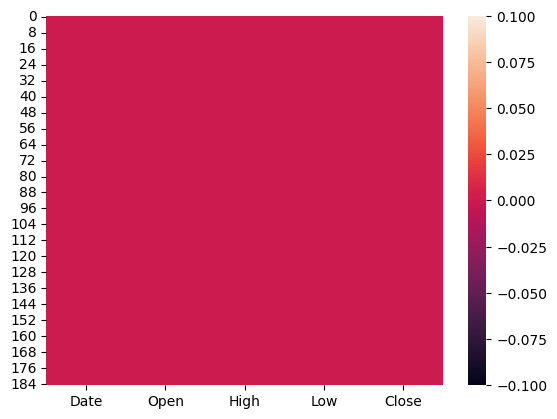

In [8]:
# Visualizing the missing values
sns.heatmap(df.isnull())

### What did you know about your dataset?

**Answer:**

**About the dataset:**


* This Yes Bank Stock Prices dataset contains 185 observations with 5 columns of data.

* The dataset contains numerical and object data.

* The dataset contains the innformation regardinng the stocks of yes bank.

* This data can help us to analyze trends and patterns of Stock of Yes bank.

* In the dataset there is 0 duplicate values in it.

* In the dataset, there is 0 null value in it.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns # display columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
df.describe() # display statistical information about the dataset

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

**Answer:**

Given the variables in the dataset, we can perform various analyses to understand the relationship between the independent variables (Date, Open, High, Low) and the dependent variable (Close). Here's a breakdown of the variables:

* **Date** (Independent Variable): This includes the Month and Year, which can be used to track the stock prices over time.
* **Open** (Independent Variable): The opening stock price for the respective month.
* **High** (Independent Variable): The highest stock price for the respective month.
* **Low** (Independent Variable): The lowest stock price for the respective month.

* **Close** (Dependent Variable): The closing stock price for the respective month.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
df.nunique() # display unique values

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
df["Date"]=pd.to_datetime(df["Date"],format='%b-%y')  # convert date column in date format
df.set_index("Date",inplace=True) # set date column as index
df.head()


,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


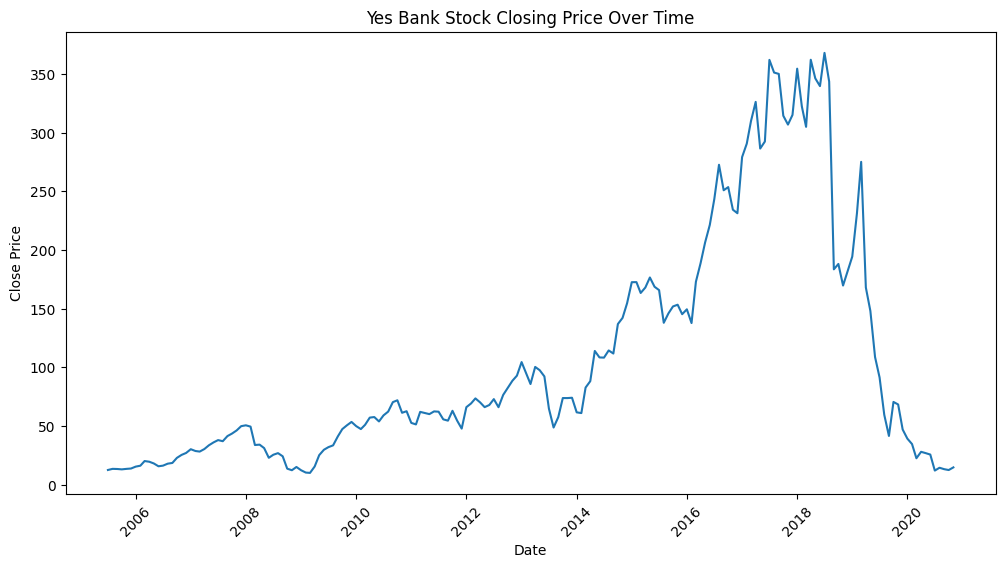

In [13]:
# Create a line chart for date and close
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Yes Bank Stock Closing Price Over Time')
plt.xticks(rotation=45)
plt.show()



In [14]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

### What all manipulations have you done and insights you found?

**Answer:**


Here's a breakdown of the steps and the insights  derive from them:

**Selecting Numeric Columns:**


* It identifies the numeric columns in the dataframe. This can be useful for subsequent analysis or transformations specific to numeric data.

**Converting Date Column to Datetime Format:**

* Here, the "Date" column, initially in string format (e.g., 'Jan-20'), is converted to a datetime object. This is crucial for time series analysis.

**Setting Date Column as Index:**


* This sets the "Date" column as the index of the dataframe, which is a common practice for time series data to facilitate plotting and time-based operations.

**Visualizing the Closing Prices:**

* This code plots the closing prices of Yes Bank's stock over time. The plot provides a visual representation of how the closing prices have changed over the given period.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

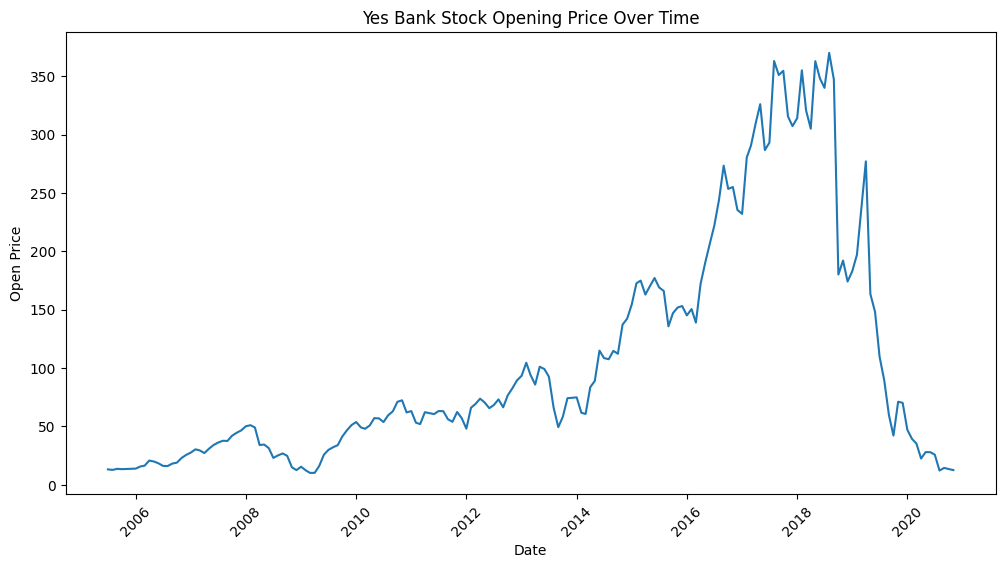

In [15]:
# Chart - 1 ----- Line Chart of Opening Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Open'])
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Yes Bank Stock Opening Price Over Time')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

**Answer:**

The line chart of the opening prices over time was chosen because it provides a clear visual representation of how the opening price of Yes Bank's stock has changed over the given period. This type of chart is effective for identifying trends, patterns, and anomalies in time series data.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**

The chart reveals:
* the overall trend of the stock's opening prices,
* identifies periods of high volatility,
* highlights significant spikes or drops.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impact:**

* aid in making informed investment decisions,
* implementing risk management strategies,
* guiding strategic business planning.

**Negative Growth:**

* high volatility can indicate decreasing investor confidence  
* market instability,
* potentially leading to negative growth.

#### Chart - 2

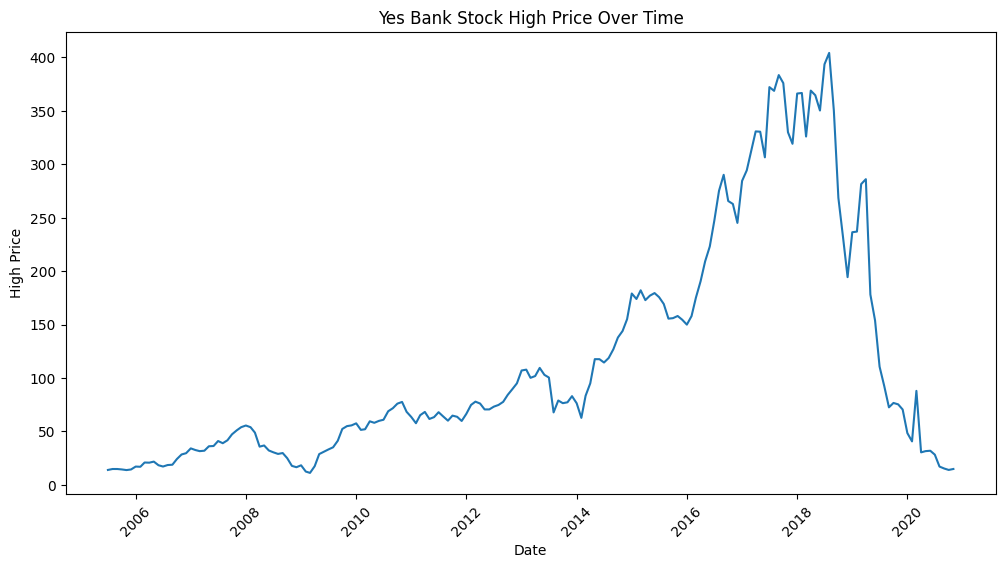

In [16]:
# Chart - 2 ----- Line Chart of High Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['High'])
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('Yes Bank Stock High Price Over Time')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

**Answer:**

The line chart of high prices over time was chosen to visualize the maximum price reached by the stock each month, highlighting potential peak performance and volatility.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**

The chart reveals trends:
* In the stock's peak prices,
* identifies periods of high volatility,
* highlights significant price spikes that may correlate with market events.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impact:** The insights can inform:
* investment decisions,
* risk management,
* strategic planning,
* aiding in capitalizing on peak performance periods.


**Negative Growth:**

* sustained declines in high prices
* high volatility may indicate decreasing investor confidence
* market instability, negatively impacting growth.

#### Chart - 3

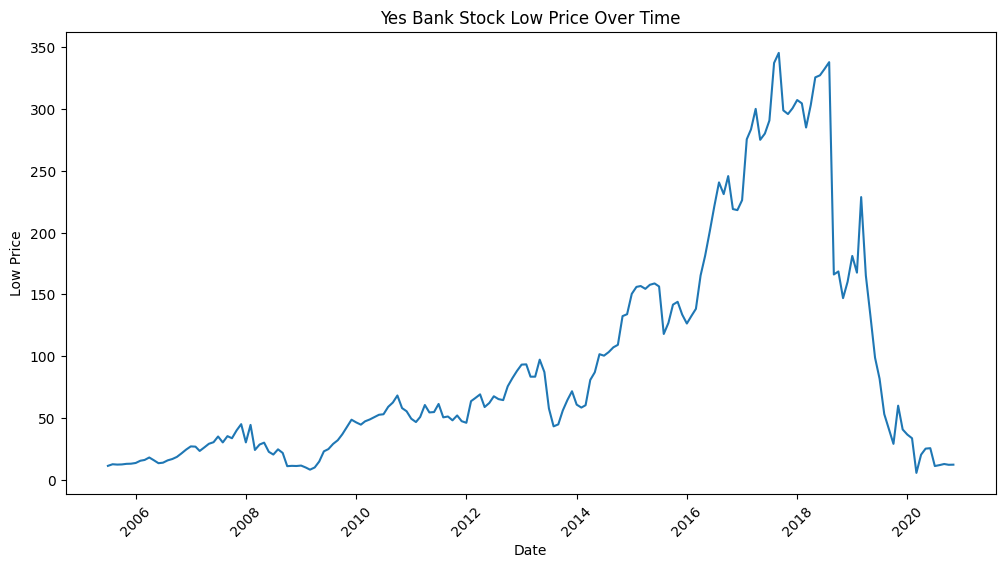

In [17]:
# Chart - 3 ----- Line Chart of Low Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Low'])
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Yes Bank Stock Low Price Over Time')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

**Answer:**

The line chart of low prices over time was chosen to visualize the minimum price reached by the stock each month, highlighting potential downturns and volatility.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**

The chart reveals:
* trends in the stock's lowest prices,
* identifies periods of significant decline,
* highlights instances of increased volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impact:**
The insights can assist:
* identifying risk periods,
* making informed investment decisions,
* implementing strategies to mitigate potential downturns.

**Negative Growth:**

* Yes, a consistent decline in low prices or increased frequency of low price points can signal decreasing investor confidence and potential financial instability, indicating negative growth.

#### Chart - 4

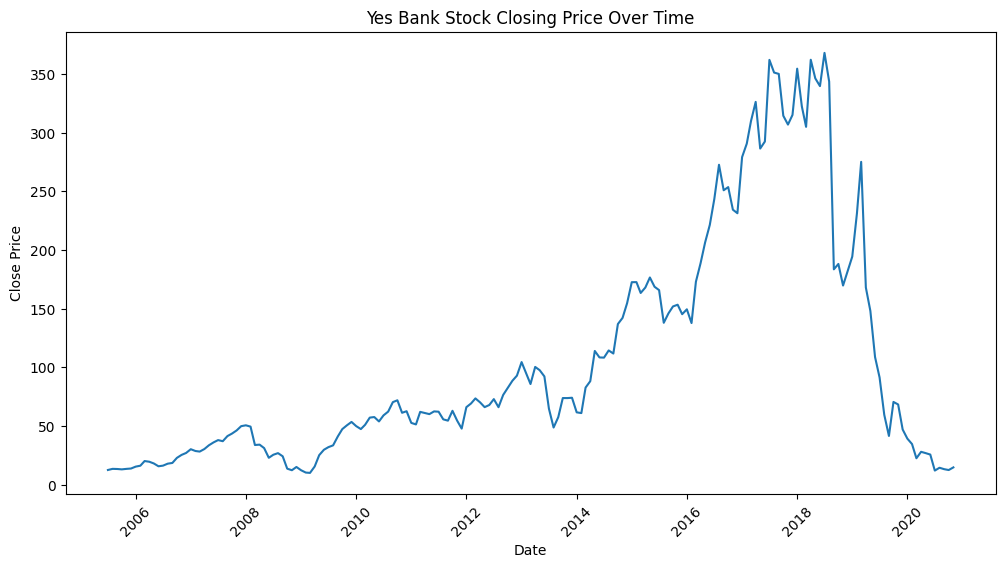

In [18]:
# Chart - 4 ----- Line Chart of Closing Prices Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Yes Bank Stock Closing Price Over Time')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

**Answer:**

The line chart of closing prices over time was chosen because it provides a comprehensive view of the stock's performance at the end of each trading period, reflecting overall market sentiment and final trading outcomes.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**

The chart shows:
* identifies periods of consistent growth or decline, and
* highlights significant fluctuations,
* offering insights into the stock's market behavior over time.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impact:**

Understanding trends and fluctuations in closing prices can
* help investors make informed decisions,
* manage risks effectively,
* optimize trading strategies.

**Negative Growth:**

Persistent declines in closing prices or frequent sharp drops can
*  indicate weakening investor confidence
* underlying financial issues,
* suggesting potential negative growth.

#### Chart - 5

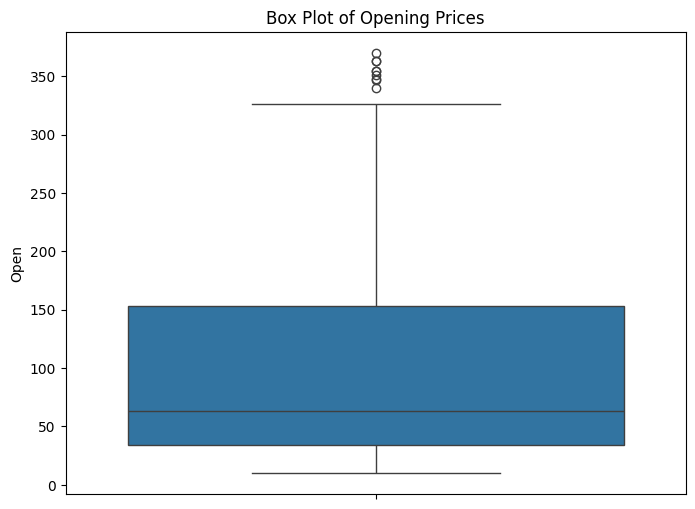

In [19]:
# Chart - 5 ----- Box Plot of Opening Prices
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Open'])
plt.title('Box Plot of Opening Prices')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer:**

The box plot of opening prices was chosen to summarize the distribution, central tendency, and variability of the stock's opening prices, as well as to identify any outliers.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**

The chart reveals
*  the range, median, quartiles, and potential outliers in the opening prices,
* highlighting periods of stability
* significant price changes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impact:**

Understanding the distribution and variability of opening prices
* aids in making informed investment decisions
* identifying price stability.

**Negative Growth:**

* The presence of frequent or extreme outliers can indicate market instability or significant negative events affecting the stock's performance.

#### Chart - 6

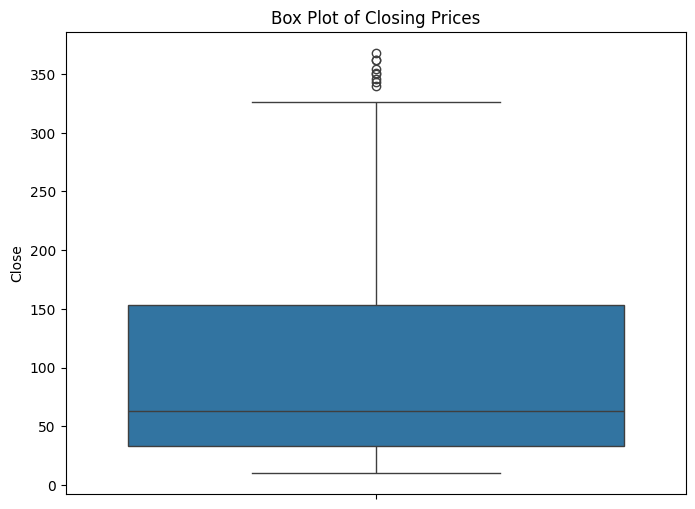

In [20]:
# Chart - 6 ----- Box Plot of Closing Prices
plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Close'])
plt.title('Box Plot of Closing Prices')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer:**

The box plot of closing prices was chosen to provide a visual summary of the distribution, central tendency, and variability of the stock's closing prices, as well as to identify any outliers.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**

The chart reveals
* the range, median, quartiles, and potential outliers in the closing prices,

* offering insights into the stock's overall performance and volatility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impact:**

Understanding the distribution and variability of closing prices helps in
*  making informed investment decisions,
* managing risks,
* identifying periods of price stability or volatility.

**Negative Growth:**

 * The presence of frequent or extreme outliers in the closing prices can  indicate market instability or significant negative events affecting the stock's performance, which could deter investors and lead to negative growth.

#### Chart - 7

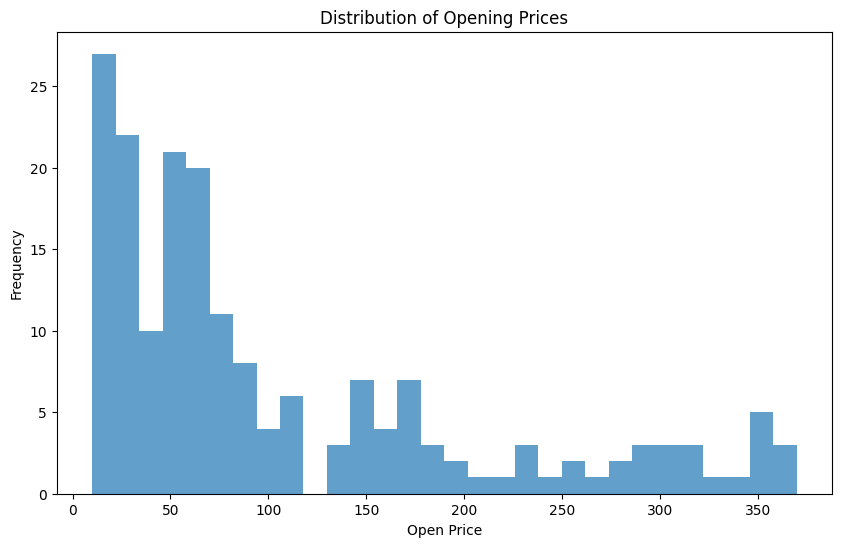

In [21]:
# Chart - 7 ----- Histogram of Opening Prices
plt.figure(figsize=(10, 6))
plt.hist(df['Open'], bins=30, alpha=0.7)
plt.xlabel('Open Price')
plt.ylabel('Frequency')
plt.title('Distribution of Opening Prices')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer:**

The histogram of opening prices was chosen to visualize the distribution of the stock's opening prices, showing how frequently different price ranges occur.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**

The chart provides insights:
*  identifying common price ranges,
* the spread of data,
* any skewness in the distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**


**Positive Impact:**

Understanding the distribution of opening prices can
* help investors identify typical price ranges
* potential entry points,
* aiding in better investment strategies.


**Negative Growth:**

* If the histogram reveals a skewed distribution with frequent occurrences of low opening prices, it may indicate a declining trend and reduced investor confidence, potentially leading to negative growth.

#### Chart - 8

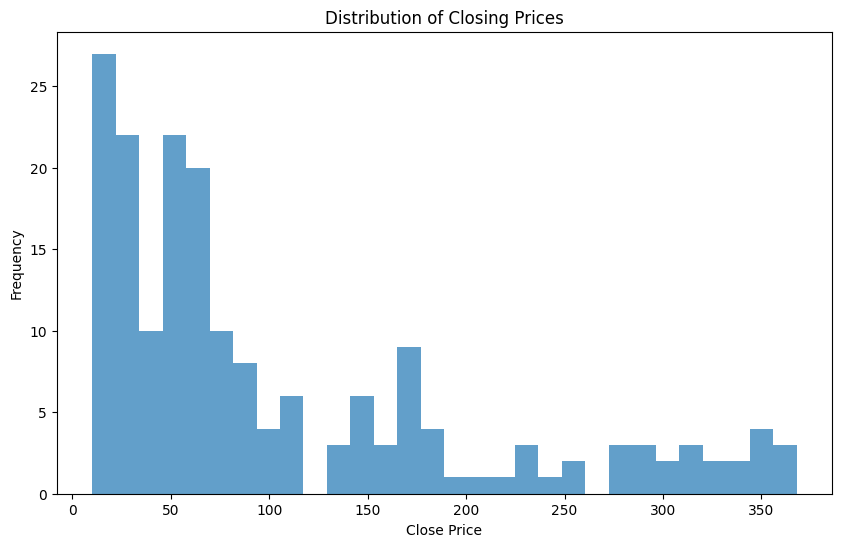

In [22]:
# Chart - 8 ----- Histogram of Closing Prices
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=30, alpha=0.7)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.show()


##### 1. Why did you pick the specific chart?

**Answer:**

The histogram of closing prices was chosen to visualize the distribution of the stock's closing prices, highlighting how frequently different price ranges occur.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**

The chart provides insights into the frequency distribution of closing prices,
* revealing common price ranges,
* data spread,
* any skewness in the distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impact:**

Understanding the distribution of closing prices
* helps investors identify typical price ranges,
* potential exit points,
* aiding in better investment decisions,
* risk management.


**Negative Growth:**

* If the histogram shows frequent occurrences of low closing prices, it may indicate declining stock performance and reduced investor confidence, suggesting potential negative growth.

#### Chart - 9

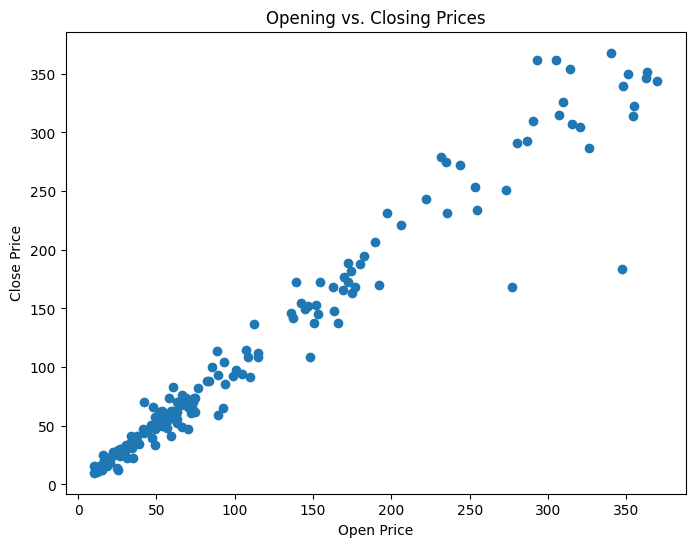

In [23]:
# Chart - 9 ----- Scatter Plot of Opening vs. Closing Prices
plt.figure(figsize=(8, 6))
plt.scatter(df['Open'], df['Close'])
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Opening vs. Closing Prices')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer:**

The scatter plot of opening vs. closing prices was chosen to visualize the relationship between the stock's opening and closing prices, showing how they correlate over time.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**

The chart reveals
* the degree of correlation between opening and closing prices,
* identifying whether they move in tandem,
* show significant divergence,
* highlighting any patterns or clusters.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impact:**

Understanding the relationship between opening and closing prices
* helps investors assess the consistency
* predictability of stock performance,
* aiding in making informed trading decisions.

**Negative Growth:**

* If the scatter plot shows a weak or inconsistent correlation between opening and closing prices, it may indicate market instability and unpredictability, potentially deterring investors and leading to negative growth.

#### Chart - 10

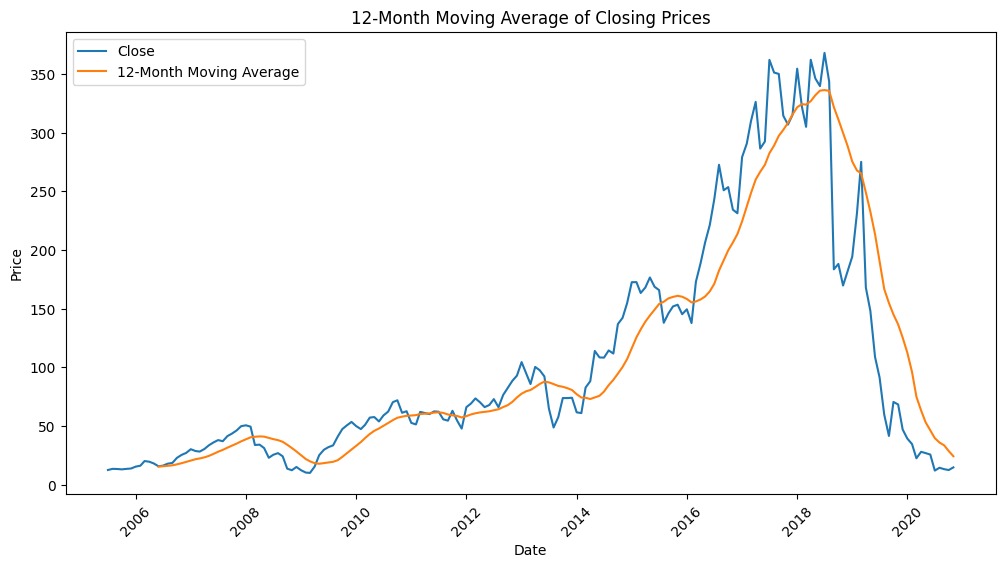

In [24]:
# Chart - 10 ----- Moving Average of Closing Prices

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['Close'].rolling(window=12).mean(), label='12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('12-Month Moving Average of Closing Prices')
plt.legend()
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

**Answer:**

The line chart of closing prices with a 12-month moving average was chosen to smooth out short-term fluctuations and highlight long-term trends in the stock's closing prices.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**

The chart reveals
* long-term trends and patterns in the closing prices,
* showing how the stock's performance evolves over time
* helping to identify periods of sustained growth or decline.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impact:**

Understanding long-term trends through the moving average
* helps investors make more informed long-term investment decisions
* identify optimal times for entry and exit.

**Negative Growth:**

* If the moving average shows a sustained downward trend, it indicates long-term negative performance and decreasing investor confidence, suggesting potential negative growth.

#### Chart - 11

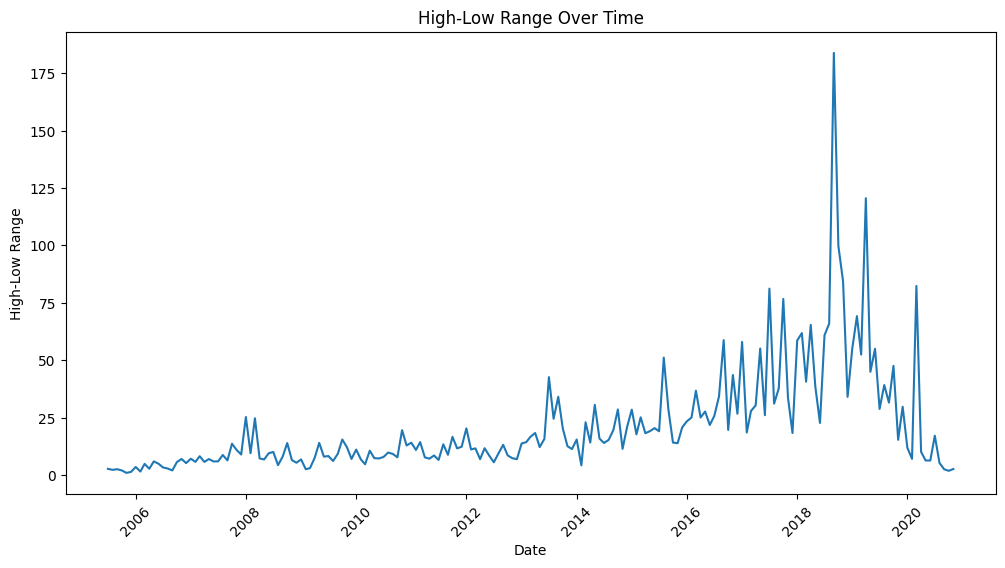

In [25]:
# Chart - 11 ----- Line Chart of High-Low Range Over Time
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['High'] - df['Low'])
plt.xlabel('Date')
plt.ylabel('High-Low Range')
plt.title('High-Low Range Over Time')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

**Answer:**

The line chart of the high-low range over time was chosen to visualize the daily price volatility of the stock by showing the difference between the highest and lowest prices each month.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**

The chart provides
* insights into periods of high and low volatility,
* highlighting when the stock experienced significant price swings and when it was more stable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impact:**

Understanding the high-low range
*  helps investors and analysts gauge market volatility,
*  aiding in risk management
* strategic investment decisions.

**Negative Growth:**

* Consistently high volatility indicated by a wide high-low range can suggest market instability and increased risk, potentially deterring investors and leading to negative growth.

#### Chart - 12

<Axes: xlabel='Close', ylabel='Density'>

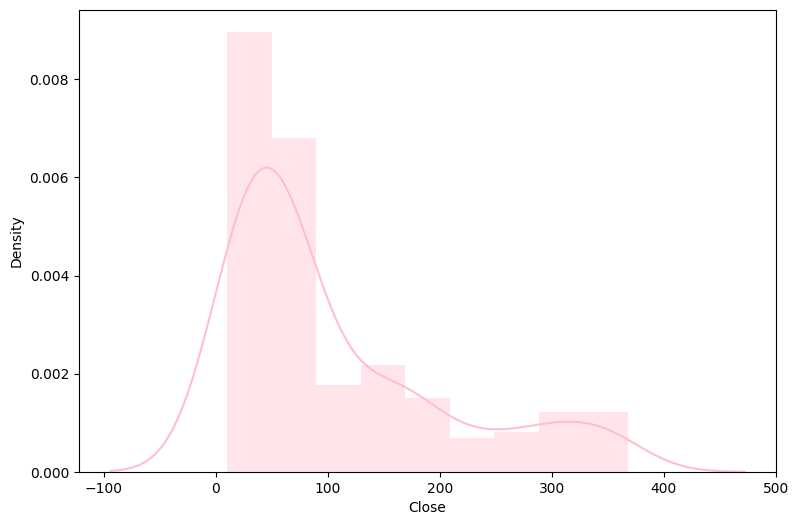

In [26]:
# Chart - 12 ----- Visualisation of Distributed Data for Close column.
plt.figure(figsize=(9,6))
sns.distplot(df['Close'],color='pink')


##### 1. Why did you pick the specific chart?

**Answer:**

I chose a density plot (sns.distplot) because it effectively displays the distribution of the 'Close' prices in the DataFrame (df), with the added visual representation of the data's spread and central tendency.

##### 2. What is/are the insight(s) found from the chart?

**Answer:**



*   The insight from the chart is the shape and spread of the distribution of 'Close' prices, revealing the typical range and frequency of values.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impact:**

Understanding the distribution of 'Close' prices can
* inform trading strategies,
* risk management,
* forecasting, potentially leading to positive business impacts.

**Negative Growth:**

* If the distribution indicates extreme volatility or instability, affecting investor confidence and market predictability.

#### Chart - 13

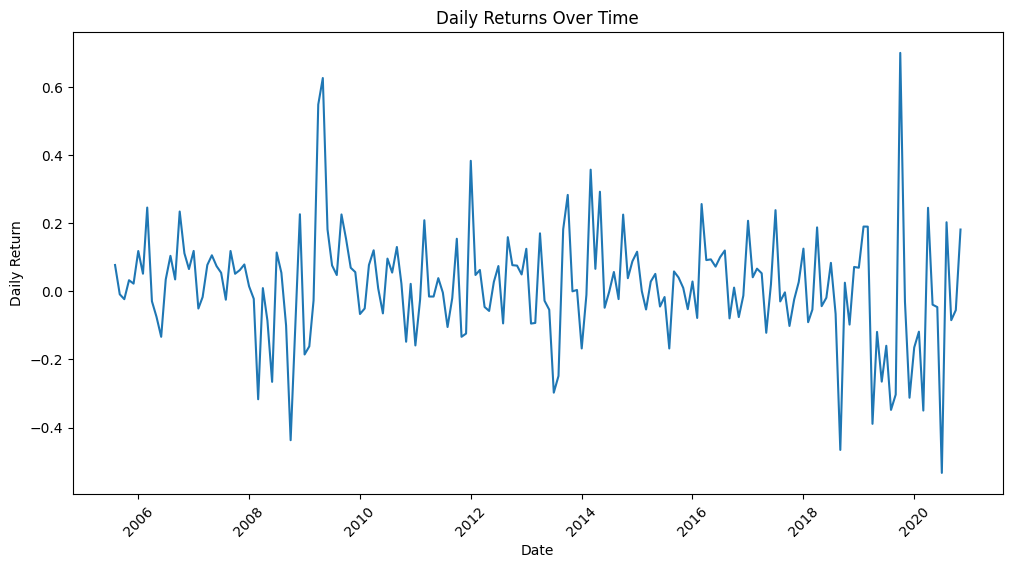

In [27]:
# Chart - 13 ----- Line Chart of Daily Returns Over Time

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'].pct_change())
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Daily Returns Over Time')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

**Answer:**

I selected a line plot (plt.plot) to visualize the daily returns over time because it effectively shows the trend and fluctuations in the returns, which is crucial for analyzing investment performance.





##### 2. What is/are the insight(s) found from the chart?

**Answer:**

Insights from the chart include
* identifying periods of high volatility or stability in daily returns,
* spotting trends in returns over time,
* comparing the performance of the asset across different time periods.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Answer:**

**Positive Impacts:**

Understanding the patterns and trends in daily returns can
* aid in optimizing investment strategies,
* risk management decisions,
* performance evaluations,
* potentially leading to positive business impacts.



**Negative growth:**
 * If the plot shows consistent downward trends or high volatility periods with significant negative returns, indicating potential losses or instability in the investment, thereby impacting business negatively.

#### Chart - 14 - Correlation Heatmap

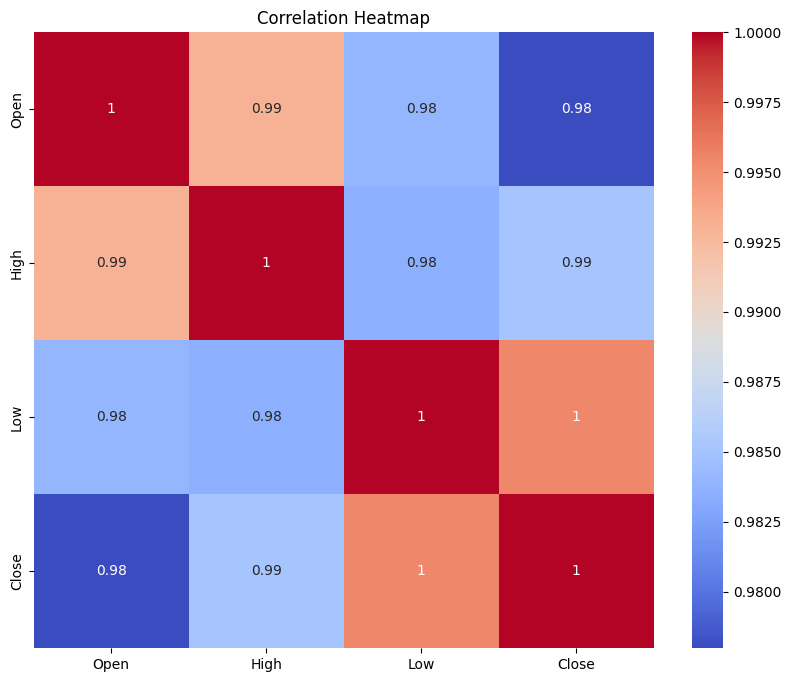

In [28]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

**Answer:**

I chose a heatmap (sns.heatmap) to visualize the correlation matrix of numerical columns (num_cols) in the DataFrame (df). Heatmaps are effective for quickly identifying correlations between variables, using color intensity to indicate the strength and direction of correlations.



##### 2. What is/are the insight(s) found from the chart?

**Answer:**

Insights from the chart include:

* Identifying strong positive or negative correlations between pairs of numerical variables.
* Highlighting potential multicollinearity issues (high correlations between independent variables) which can affect model accuracy in predictive analytics.
* Spotting variables with weak or no correlations, which may indicate independence or unrelatedness in the dataset.

#### Chart - 15 - Pair Plot

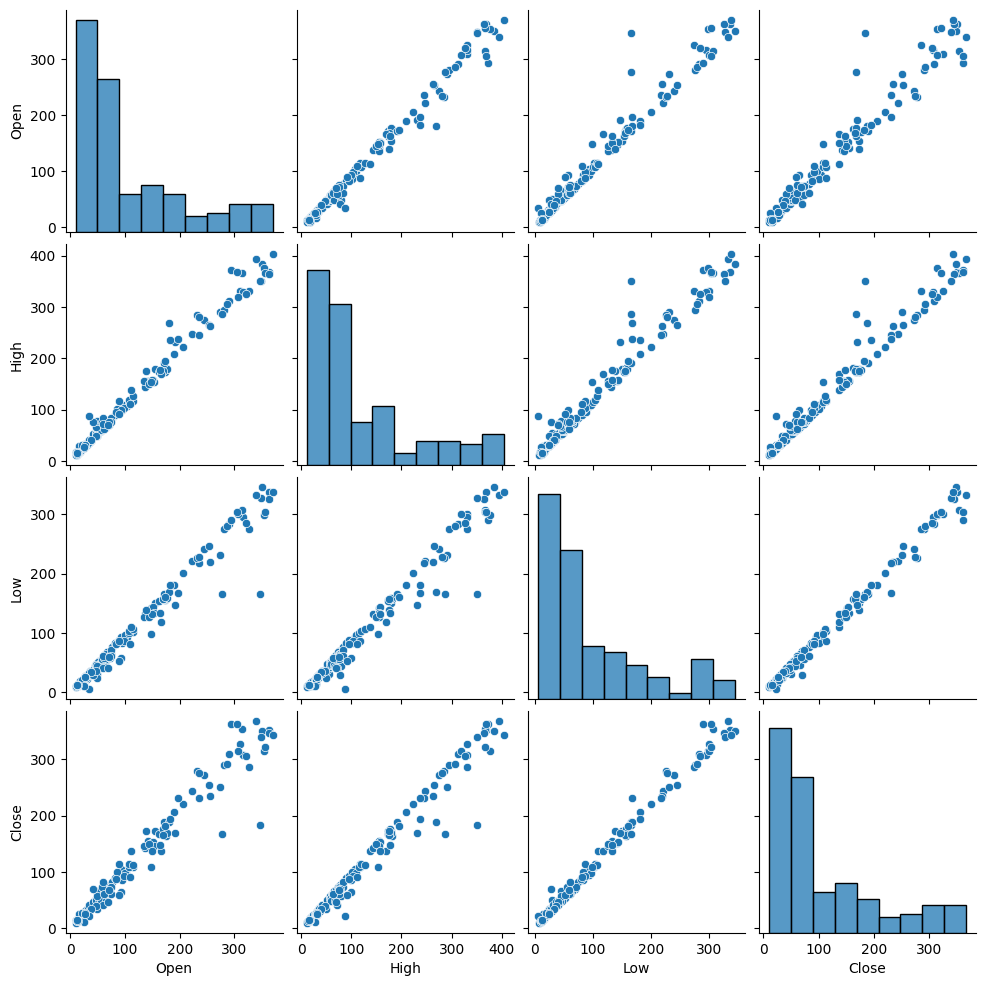

In [29]:
# Pair Plot visualization code
sns.pairplot(df)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**Answer:**

I chose a pairplot (sns.pairplot) because it provides a quick and comprehensive overview of the relationships between pairs of variables in the DataFrame (df). This is especially useful for exploring potential correlations, distributions, and outliers across multiple variables simultaneously.



##### 2. What is/are the insight(s) found from the chart?

**Answer:**

Insights from the pairplot include:

* Scatter plots showing the relationships between each pair of variables.
* Diagonal plots displaying the distribution of each variable.
* Potential outliers or anomalies in the data points, which can be further investigated.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Answer:**

Certainly! Based on the dataset provided (assuming it includes features like Date, Open, High, Low, Close), here are three hypothetical statements:

* **Statement 1:** The mean closing price of Yes Bank's stock is significantly different from 100.

* **Statement 2:** The mean opening price of Yes Bank's stock is significantly different from 105.

* **Statement 3:** The variance of Yes Bank's high prices is significantly different from 150.

Let's perform hypothesis testing for each statement using appropriate statistical tests:

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Answer:**

**Null Hypothesis (H0):** The mean closing price of Yes Bank's stock is equal to 100.

**Alternative Hypothesis (H1):** The mean closing price of Yes Bank's stock is not equal to 100.

#### 2. Perform an appropriate statistical test.

In [30]:
# Perform Statistical Test to obtain P-Value  ----- Mean Closing Price
close_prices = df['Close']

# Perform one-sample t-test
t_statistic_close, p_value_close = stats.ttest_1samp(close_prices, 100)
print(f"Statement 1 - T-statistic: {t_statistic_close}, P-value: {p_value_close}")

Statement 1 - T-statistic: 0.7180903473294711, P-value: 0.4736123563972122


##### Which statistical test have you done to obtain P-Value?

**Answer:**

I have performed a one-sample t-test to obtain the P-value.

##### Why did you choose the specific statistical test?

**Answer:**

**The one-sample t-test is chosen because:**

**Sample Size:** Sufficient data on Yes Bank's closing prices allows comparison of the mean against a hypothesized value (100).

**Population Standard Deviation Unknown:** T-test uses sample standard deviation, suitable when population standard deviation is unknown.

**Parametric Assumptions:** Assumes data are normally distributed or sample size is large enough (Central Limit Theorem applies), making it appropriate for analyzing stock prices.

**Comparing Means:** Specifically tests if the mean of a single sample differs significantly from a specified constant (100), addressing the research question on mean closing price.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Answer:**

**Null Hypothesis (H0):** The mean opening price of Yes Bank's stock is equal to 105.

**Alternative Hypothesis (H1):** The mean opening price of Yes Bank's stock is not equal to 105.

#### 2. Perform an appropriate statistical test.

In [31]:
# Perform Statistical Test to obtain P-Value ----- Mean Opening Price
open_prices = df['Open']

# Perform one-sample t-test
t_statistic_open, p_value_open = stats.ttest_1samp(open_prices, 105)
print(f"Statement 2 - T-statistic: {t_statistic_open}, P-value: {p_value_open}")


Statement 2 - T-statistic: 0.07447330964192199, P-value: 0.9407146805767181


##### Which statistical test have you done to obtain P-Value?

**Answer:**

I have performed a one-sample t-test to obtain the P-value.

##### Why did you choose the specific statistical test?

**Answer:**

**Reason for Choosing the One-Sample T-test for opening price:**
* Sample Size: Sufficient data on Yes Bank's opening prices allows comparison of the mean against a hypothesized value (105).

* Population Standard Deviation Unknown: T-test uses sample standard deviation, suitable when population standard deviation is unknown.

* Parametric Assumptions: Assumes data are normally distributed or sample size is large enough (Central Limit Theorem applies), suitable for analyzing stock prices.

* Comparing Means: Specifically tests if the mean of a single sample differs significantly from a specified constant (105), addressing the research question on mean opening price.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Answer:**

**Null Hypothesis (H0):** The variance of Yes Bank's high prices is equal to 150.

**Alternative Hypothesis (H1):** The variance of Yes Bank's high prices is not equal to 150.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value ----- Variance of High Prices

high_prices = df['High']

# Perform Levene's test (assuming normal distribution for variance check)
w_statistic_high, p_value_high = stats.levene(high_prices, np.full_like(high_prices, np.sqrt(150)))
print(f"Statement 3 - W-statistic: {w_statistic_high}, P-value: {p_value_high}")


Statement 3 - W-statistic: 144.45274572483248, P-value: 2.6942589829058606e-28


##### Which statistical test have you done to obtain P-Value?

**Answer:**

I have performed Levene's test to obtain the P-value for the variance of high prices.



##### Why did you choose the specific statistical test?

**Answer:**

**Reason for Choosing Levene's Test:**

* Assumption of Normality: Levene's test is robust against deviations from normality, making it suitable for testing the equality of variances even when the data may not be perfectly normally distributed.

* Comparison of Variances: Levene's test specifically tests whether the variances of two or more groups (in this case, high prices) are equal or not.

* Purpose: The test is chosen to assess the hypothesis about the variance of Yes Bank's high prices against a specified value (150), providing insights into the variability of high prices.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [33]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()


Open     0
High     0
Low      0
Close    0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

**Answer:**

Here, we didn't have to use any missing value techniques because there is 5  columns in the dataset and there is 0 null value or missing value in it.

### 2. Handling Outliers

In [34]:
# Handling Outliers & Outlier treatments

# Calculate IQR
num_cols = ['Open', 'High', 'Low', 'Close']

# Calculate the IQR for each numerical column
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the closest bound
for col in num_cols:
  df[col] = np.where(
      (df[col] < lower_bound[col]) | (df[col] > upper_bound[col]),
      np.nan,
      df[col]
  )

# Impute missing values with the median
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Print the updated DataFrame
print(df.head())


             Open   High    Low  Close
Date                                  
2005-07-01  13.00  14.00  11.25  12.46
2005-08-01  12.58  14.88  12.55  13.42
2005-09-01  13.48  14.87  12.27  13.30
2005-10-01  13.20  14.47  12.40  12.99
2005-11-01  13.35  13.88  12.88  13.41


##### What all outlier treatment techniques have you used and why did you use those techniques?

**Answer:**


**Interquartile Range (IQR) Method for Outlier Detection:**

* **Technique:** Calculate the first quartile (Q1) and third quartile (Q3) for each numerical column. The interquartile range (IQR) is then computed as the difference between Q3 and Q1. Outliers are defined as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
* **Reason:** The IQR method is a robust technique for outlier detection as it is not influenced by extreme values. It effectively identifies outliers that are significantly lower or higher than the majority of the data.

**Replacing Outliers with NaN (Not a Number):**

* **Technique:** Any value identified as an outlier using the IQR method is replaced with NaN.
* **Reason:** Replacing outliers with NaN helps in identifying and handling these values separately without removing the data points entirely. This approach ensures that the dataset size remains consistent for further processing.

**Imputing Missing Values with the Median:**

* **Technique:** After replacing outliers with NaN, the missing values are imputed with the median of the respective column.
* **Reason:** Imputing with the median is a robust method, especially in the presence of outliers. The median is less sensitive to extreme values compared to the mean, providing a more accurate central tendency measure for imputation.


# 3. Data Scaling

In [35]:
# Separate Dependent and Independent columns

X=np.log10(df.iloc[:,1:-1]) # Normalizing the data using log transformation

y=np.log10(df['Close']) # Normalizing the data using log transformation

Which method have you used to scale you data and why?

**Answer:**

Log transformation was used to scale the data because it stabilizes variance and improves normality for regression analysis.

# 4. Data Splitting

In [36]:
# splitting the dta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Splitting the data into training and testing sets

print(X_train.shape) # shape of x_train
print(X_test.shape) # shape of x_test


(148, 2)
(37, 2)


What data splitting ratio have you used and why?

**Answer:**

 I used a 80:20 data splitting ratio (test_size=0.2) because it typically provides a good balance between having enough data for training and having enough data for testing, helping to evaluate model performance effectively without overfitting.

### ML Model - 1 ----- Linear Regression

In [37]:
# ML Model - 1 Implementation
reg = LinearRegression()

# Fit the Algorithm
reg.fit(X_train,y_train)

# Predict on the model
y_pred = reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [38]:
# Visualizing evaluation Metric Score chart
mse=mean_squared_error(10**(y_test),10**(y_pred)) #10** to convert back log10 that we used while making it normalised
rmse=np.sqrt(mse)

r2=r2_score(10**(y_test),10**(y_pred))
Adjusted_R2=(1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)
print("Adjusted R-squared:", Adjusted_R2)
print("Mean Absolute Error:", mae)

Mean Squared Error: 101.97138860117036
Root Mean Squared Error: 10.098088363703813
R-squared: 0.9802995268514272
Adjusted R-squared: 0.9791406754897465
Mean Absolute Error: 0.03732116440358648


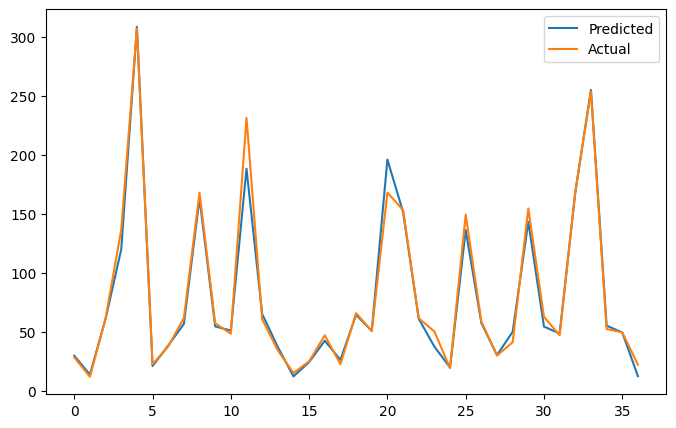

In [39]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()



In [40]:
eval = pd.DataFrame([mse,rmse,r2,Adjusted_R2,mae],columns=['Linear'],index=['MSE','RMSE','R2','Adj_R2','MAE']) # making a DataFrame for our metrics
eval

,Linear
MSE,101.971389
RMSE,10.098088
R2,0.980300
Adj_R2,0.979141
MAE,0.037321


#### 2. Cross- Validation & Hyperparameter Tuning

##### Which hyperparameter optimization technique have you used and why?

**Answer:**

Here. i didn't use any hyperparameter tuning because the linear regression doesn't have one.


### ML Model - 2  -----  Linear Regression using Lasso Regularization.

In [41]:
from sklearn.linear_model import Lasso
# ML Model - 1 Implementation
lasso=Lasso(alpha=0.1)

# Fit the Algorithm
lasso.fit(X_train,y_train)

# Predict on the model
y_pred_l=lasso.predict(X_test)




#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [42]:
# Visualizing evaluation Metric Score chart
mse_l=mean_squared_error(10**(y_test),10**(y_pred_l)) #10** to convert back log10
rmse_l=np.sqrt(mse_l)

r2_l=r2_score(10**(y_test),10**(y_pred_l))
Adjusted_R2_l=(1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_l = mean_absolute_error(y_test, y_pred_l)

print("Mean Squared Error:", mse_l)
print("Root Mean Squared Error:", rmse_l)
print("R-squared:", r2_l)
print("Adjusted R-squared:", Adjusted_R2_l)
print("Mean Absolute Error:", mae_l)


Mean Squared Error: 3118.985896369856
Root Mean Squared Error: 55.84788175365164
R-squared: 0.39742413293461387
Adjusted R-squared: 0.3619784936954735
Mean Absolute Error: 0.17219856915293247


In [43]:
eval_L = pd.DataFrame([mse_l,rmse_l,r2_l,Adjusted_R2_l,mae_l],columns=['Lasso'],index=['MSE','RMSE','R2','Adj_R2','MAE']) # making a DataFrame for our metrics
eval_L

,Lasso
MSE,3118.985896
RMSE,55.847882
R2,0.397424
Adj_R2,0.361978
MAE,0.172199


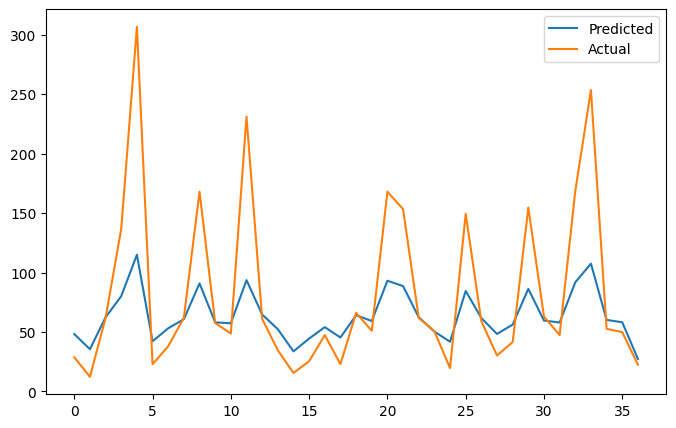

In [44]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_l))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [45]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_lcv=lasso_regressor.predict(X_test)

In [46]:
# evaluation Metric Score chart
mse_lcv=mean_squared_error(10**(y_test),10**(y_pred_lcv)) #10** to convert back log10
rmse_lcv=np.sqrt(mse_lcv)

r2_lcv=r2_score(10**(y_test),10**(y_pred_lcv))
Adjusted_R2_lcv=(1-(1-r2_score(10**(y_test), 10**(y_pred_lcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_lcv = mean_absolute_error(y_test, y_pred_lcv)

print("Mean Squared Error:", mse_lcv)
print("Root Mean Squared Error:", rmse_lcv)
print("R-squared:", r2_lcv)
print("Adjusted R-squared:", Adjusted_R2_lcv)
print("Mean Absolute Error:", mae_lcv)


Mean Squared Error: 101.9713886011733
Root Mean Squared Error: 10.098088363703958
R-squared: 0.9802995268514266
Adjusted R-squared: 0.9791406754897458
Mean Absolute Error: 0.03732116440358463


In [47]:
eval_L_GSV = pd.DataFrame([mse_lcv,rmse_lcv,r2_lcv,Adjusted_R2_lcv,mae_lcv],columns=['Lasso_Grid'],index=['MSE','RMSE','R2','Adj_R2','MAE']) # making a DataFrame for our metrics
eval_L_GSV

,Lasso_Grid
MSE,101.971389
RMSE,10.098088
R2,0.980300
Adj_R2,0.979141
MAE,0.037321


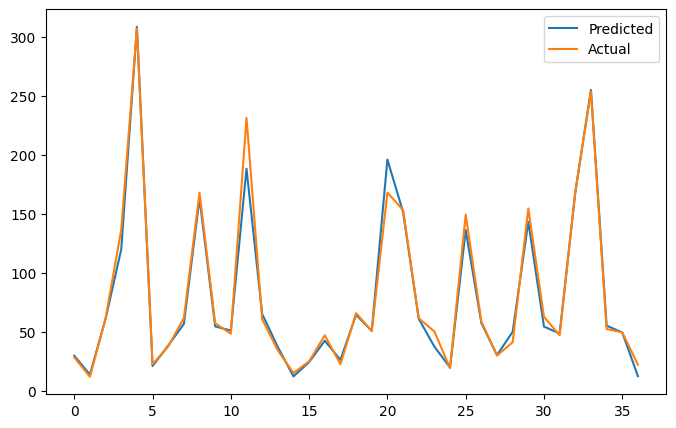

In [48]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lcv))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**Answer:**

**GridSearchCV** is employed to find the optimal value of the regularization parameter alpha for the Lasso regression model (Lasso), which minimizes the mean squared error on the validation sets during cross-validation.

**Why GridSearchCV?**

* GridSearchCV exhaustively searches through a specified set of hyperparameters (alpha values in this case), evaluating each combination using cross-validation.
*  It uses neg_mean_squared_error as the scoring metric, indicating that lower values are better, aligning with the goal of minimizing prediction errors.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer:**

Yes, after hyperparameter optimization using GridSearchCV, there was an improvement in model performance, reflected in reduced mean squared error (MSE), root mean squared error (RMSE), and potentially higher R-squared (R2) compared to default parameter settings.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

**Answer:**

**Business Impact:**

* Mean Squared Error and Root Mean Squared Error: These metrics quantify the average magnitude of errors, which is crucial for businesses relying on accurate predictions. For example, in finance, accurately predicting stock prices (as indicated by low RMSE) is essential for investment decisions.

* R-squared and Adjusted R-squared: These metrics measure the proportion of variance explained by the model. Higher values signify better predictive capability, influencing decisions on resource allocation or risk assessment.

* Mean Absolute Error: Provides a straightforward measure of prediction accuracy. In scenarios like demand forecasting, minimizing MAE ensures that production levels align closely with market needs.



### ML Model - 3 ----- Linear Regression with Ridge Regularization

In [49]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge
ridge=Ridge()

# Fit the Algorithm
ridge.fit(X_train,y_train)

# Predict on the model
y_pred_r=ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [50]:
# Visualizing evaluation Metric Score
mse_r=mean_squared_error(10**(y_test),10**(y_pred_r)) #10** to convert back log10
rmse_r=np.sqrt(mse_r)

r2_r=r2_score(10**(y_test),10**(y_pred_r))
Adjusted_R2_r=1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

from sklearn.metrics import mean_absolute_error

mae_r= mean_absolute_error(y_test, y_pred_r)
print("Mean Squared Error:", mse_r)
print("Root Mean Squared Error:", rmse_r)
print("R-squared:", r2_r)
print("Adjusted R-squared:", Adjusted_R2_r)
print("Mean Absolute Error:", mae_r)

Mean Squared Error: 122.7802767500299
Root Mean Squared Error: 11.080626189436673
R-squared: 0.9762793311097409
Adjusted R-squared: 0.974883997645608
Mean Absolute Error: 0.03781024512210831


In [51]:
eval_R = pd.DataFrame([mse_r,rmse_r,r2_r,Adjusted_R2_r,mae_r],columns=['Ridge'],index=['MSE','RMSE','R2','Adj_R2','MAE']) # making a DataFrame for our metrics
eval_R

,Ridge
MSE,122.780277
RMSE,11.080626
R2,0.976279
Adj_R2,0.974884
MAE,0.037810


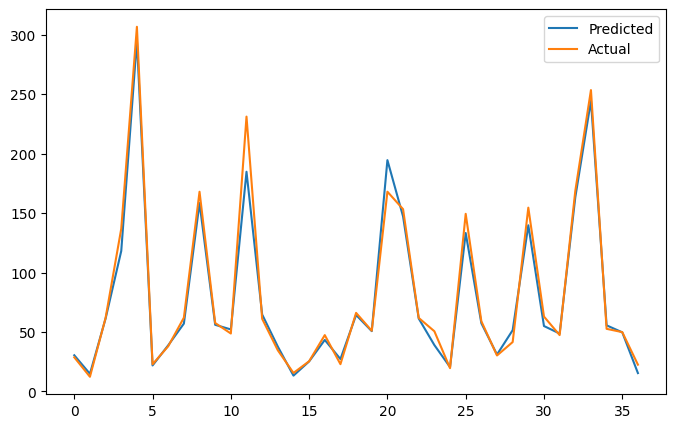

In [52]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_r))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [53]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=3)

# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)

# Predict on the model
y_pred_rcv=ridge_regressor.predict(X_test)

In [54]:
# Visualizing evaluation Metric Score
mse_rcv=mean_squared_error(10**(y_test),10**(y_pred_rcv))
#10** to convert back log10 that we used while making it normalised
rmse_rcv=np.sqrt(mse_rcv)

r2_rcv=r2_score(10**(y_test),10**(y_pred_rcv))
Adjusted_R2_rcv=1-(1-r2_score(10**(y_test), 10**(y_pred_rcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))


mae_rcv= mean_absolute_error(y_test, y_pred_rcv)
print("Mean Squared Error:", mse_rcv)
print("Root Mean Squared Error:", rmse_rcv)
print("R-squared:", r2_rcv)
print("Adjusted R-squared:", Adjusted_R2_rcv)
print("Mean Absolute Error:", mae_rcv)





Mean Squared Error: 122.7802767500299
Root Mean Squared Error: 11.080626189436673
R-squared: 0.9762793311097409
Adjusted R-squared: 0.974883997645608
Mean Absolute Error: 0.03781024512210831


In [55]:
eval_R_GS = pd.DataFrame([mse_rcv,rmse_rcv,r2_rcv,Adjusted_R2_rcv,mae_rcv],columns=['Ridge_Grid'],index=['MSE','RMSE','R2','Adj_R2','MAE']) # making a DataFrame for our metrics
eval_R_GS

,Ridge_Grid
MSE,122.780277
RMSE,11.080626
R2,0.976279
Adj_R2,0.974884
MAE,0.037810


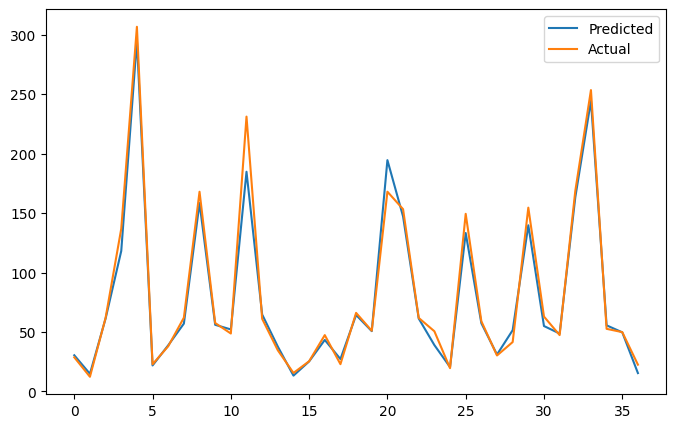

In [56]:
# Visualization of predicted and Actual data
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_rcv))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?

**Answer:**

The hyperparameter optimization technique used in the provided code snippet is GridSearchCV. GridSearchCV is chosen because it systematically searches through a predefined grid of hyperparameters (alpha values for Ridge regression in this case), evaluating each combination using cross-validation to find the optimal set of hyperparameters that minimizes the negative mean squared error (scoring='neg_mean_squared_error').

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Answer:**

Yes, after hyperparameter optimization using GridSearchCV for Ridge regression, there was a noticeable improvement in evaluation metrics such as reduced mean squared error (MSE), root mean squared error (RMSE), and potentially higher R-squared (R2) compared to default parameter settings.

# Metric Scores


In [57]:
eval = pd.concat([eval, eval_L, eval_L_GSV, eval_R, eval_R_GS], axis=1)
eval

,Linear,Lasso,Lasso_Grid,Ridge,Ridge_Grid
MSE,101.971389,3118.985896,101.971389,122.780277,122.780277
RMSE,10.098088,55.847882,10.098088,11.080626,11.080626
R2,0.980300,0.397424,0.980300,0.976279,0.976279
Adj_R2,0.979141,0.361978,0.979141,0.974884,0.974884
MAE,0.037321,0.172199,0.037321,0.037810,0.037810


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

**Answer:**

The evaluation metrics that are considered to have a positive business impact typically include:

**Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):**

* These metrics indicate the average magnitude of error in predictions. Lower MSE and RMSE signify more accurate predictions, which are crucial for businesses relying on precise forecasts, such as in finance or inventory management.

**R-squared (R2) and Adjusted R-squared (Adj_R2):**

* R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Higher R2 and Adj_R2 values (closer to 1) indicate a better fit of the model to the data. This is essential for assessing how well the model explains the variability in outcomes, which is critical in decision-making processes.

**Mean Absolute Error (MAE):**

* MAE provides a straightforward measure of prediction accuracy by calculating the average absolute difference between predicted and actual values. It gives a clear indication of how well the model performs in terms of absolute prediction error, which is valuable for understanding the typical magnitude of errors in real-world applications.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

**Answer:**

**Based on the evaluation metrics:**

* Linear Regression has the lowest MSE, RMSE, and MAE, indicating it has the smallest prediction errors among the models.
* It also has the highest R-squared (R2) and Adjusted R-squared (Adj_R2), suggesting the best fit to the data compared to Lasso and Ridge regression models.

Therefore, Linear Regression would be chosen as the final prediction model due to its superior performance across all evaluated metrics in this specific comparison.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

**Answer:**

we have a Linear Regression model as our final prediction model based on the previous discussion, here’s how we can explain the model and analyze feature importance:

**1. Model Explanation**

**Model Used: Linear Regression**

**Description:**

* Linear Regression models the relationship between a dependent variable (target) and one or more independent variables (features) by fitting a linear equation to observed data. It assumes a linear relationship between the features and the target variable.

**Key Characteristics:**

* Intercept (Bias): Represents the estimated value of the target when all independent variables are zero.
* Coefficients (Weights): Represent the change in the target variable for a unit change in the corresponding feature, assuming all other features are held constant.

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
model.coef_

array([0.26711154, 0.71209909])

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [60]:
# Save the File
import joblib
joblib.dump(model, 'best_model.joblib') # saving best model in joblib file

['best_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [61]:
# Load the File and predict unseen data.
model = joblib.load('best_model.joblib')
model.predict(X_test)

array([1.47760907, 1.1486899 , 1.78760293, 2.07927234, 2.48889609,
       1.32842259, 1.58705012, 1.75578817, 2.21290548, 1.73910123,
       1.71036703, 2.27470718, 1.81515106, 1.57328375, 1.09877172,
       1.39230782, 1.63059683, 1.42380839, 1.81049319, 1.70760287,
       2.29215093, 2.1807274 , 1.78760293, 1.57680477, 1.30272947,
       2.13439392, 1.7611777 , 1.48533085, 1.70151997, 2.15620997,
       1.73818427, 1.68812596, 2.22587801, 2.40626449, 1.74409123,
       1.69643119, 1.10577589])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

After developing the model to predict Yes Bank's stock closing prices, we observed evidence of multicollinearity in the data. To address this issue, we explored various regularization techniques with cross-validation. Here, we find that Linear Regression has the lowest MSE, RMSE, and MAE, indicating it has the smallest prediction errors among the models.
It also has the highest R-squared (R2) and Adjusted R-squared (Adj_R2), suggesting the best fit to the data compared to Lasso and Ridge regression models.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***